<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Deploying_Image_Classification_Tensorflow_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls '/content/drive/My Drive/Colab Notebooks/Models/Image/Models'

assets	saved_model.pb	variables


In [5]:
from __future__ import absolute_import, division,print_function,unicode_literals
import tensorflow as tf

In [6]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Models/Image/Models')
print(model.outputs)

[<tf.Tensor 'dense/Identity:0' shape=(None, 3) dtype=float32>]


In [7]:
print(model.inputs)

[<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>]


In [8]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f757faf47b8>>

In [9]:
model.get_weights()

[array([[[[ 0.20834742],
          [ 0.5888533 ],
          [ 0.44482142],
          ...,
          [ 0.06637412],
          [-0.0758739 ],
          [ 0.82385516]],
 
         [[ 0.1772691 ],
          [-0.34688675],
          [ 0.7343333 ],
          ...,
          [ 0.09681732],
          [-0.44155464],
          [ 0.8772748 ]],
 
         [[ 0.17706484],
          [-0.41034952],
          [ 0.4326101 ],
          ...,
          [ 0.09240165],
          [-0.02720948],
          [ 0.79020375]]],
 
 
        [[[ 0.44978577],
          [ 1.0670848 ],
          [ 0.12934676],
          ...,
          [ 0.07859593],
          [-0.655095  ],
          [ 0.12022284]],
 
         [[ 0.67309344],
          [-0.55282366],
          [ 0.33117414],
          ...,
          [ 0.08741273],
          [-0.14351119],
          [ 0.20919554]],
 
         [[ 0.43616438],
          [-0.74709594],
          [ 0.17392375],
          ...,
          [ 0.02288428],
          [ 1.4510733 ],
          [ 0.089

In [12]:
from PIL import Image
import numpy as np

In [30]:
def scale(image):
  image = tf.cast(image,tf.float32)
  image /= 255.0
  return tf.image.resize(image,[224,224])

In [37]:
def image_decode(img):
  img= tf.io.read_file(img)
  img= tf.image.decode_jpeg(img,channels=3)
  img = scale(img)
  return np.expand_dims(img,axis=0)

In [15]:
classes=['angular_leaf_spot','bean_rust','healthy']

In [54]:
!wget -q "http://barmac.com.au/wp-content/uploads/sites/3/2016/01/Angular-Leaf-Spot-Beans1.jpg"

In [55]:
!wget -q "https://northamericanfarmer.com/naf-content/uploads/2017/04/gren-bean.jpg"

In [56]:
!wget -q "https://s3.eu-west-2.amazonaws.com/growinginteractive/diseases/bean-rust-2.jpg"

In [50]:
!ls

Angular-Leaf-Spot-Beans1.jpg  drive	       gren-bean.jpg.2
bean-rust-2.jpg		      gren-bean.jpg    sample_data
bean-rust-2.jpg.1	      gren-bean.jpg.1


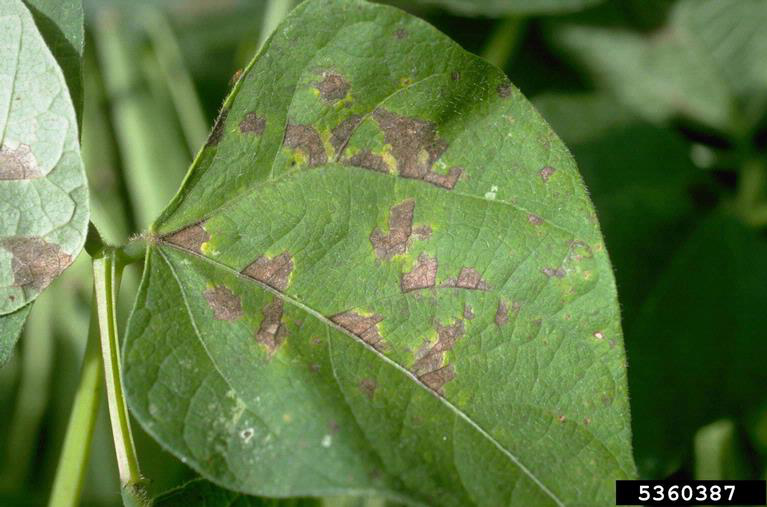

In [57]:
Image.open('Angular-Leaf-Spot-Beans1.jpg')

In [58]:
y_pred=np.argmax(model.predict(image_decode('Angular-Leaf-Spot-Beans1.jpg')),axis=1)

In [59]:
classes[y_pred[0]]

'angular_leaf_spot'

In [65]:
Image.open('gren-bean.jpg')

UnidentifiedImageError: ignored

In [ ]:
y_pred=np.argmax(model.predict(image_decode('gren-bean.jpg')),axis=1)

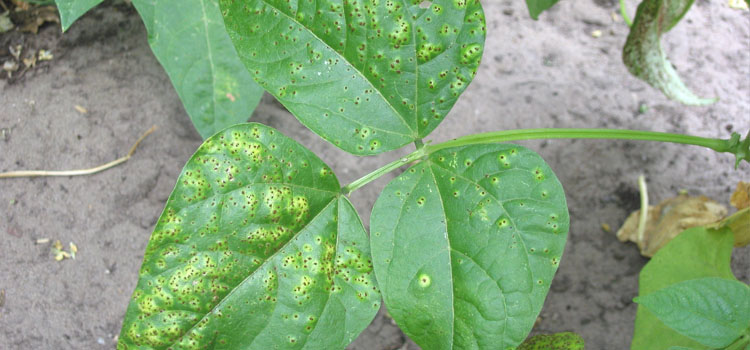

In [48]:
Image.open('bean-rust-2.jpg')

In [63]:
y_pred=np.argmax(model.predict(image_decode('bean-rust-2.jpg')),axis=1)

In [64]:
classes[y_pred[0]]

'bean_rust'